In [34]:
import tensorflow as tf
import numpy as np
import os
import graphviz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df=pd.read_csv(r'D:\document\Genre Classification Dataset\train_data.txt',sep=':::',engine='python',names=['Title','Genre','Description'])
df_test=pd.read_csv(r'D:\document\Genre Classification Dataset/test_data_solution.txt',sep=':::',engine='python',names=['Title','Genre','Description'])


In [36]:
df.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [37]:
df_test.head()

,Title,Genre,Description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [39]:
df.isnull().sum()   # no null values: great!

Title          0
Genre          0
Description    0
dtype: int64

In [40]:
df.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

# Data visualizations

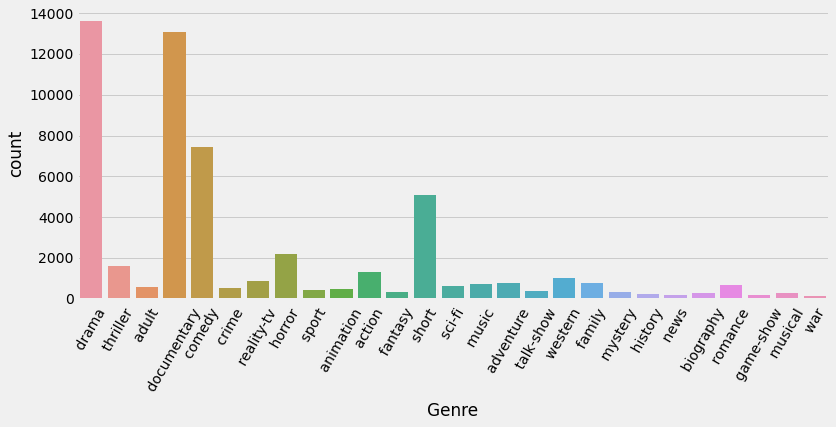

In [41]:
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,5))
sns.countplot(x=df['Genre'])    # Count of number of descriptions for each class label
plt.xticks(rotation=60)
plt.show()

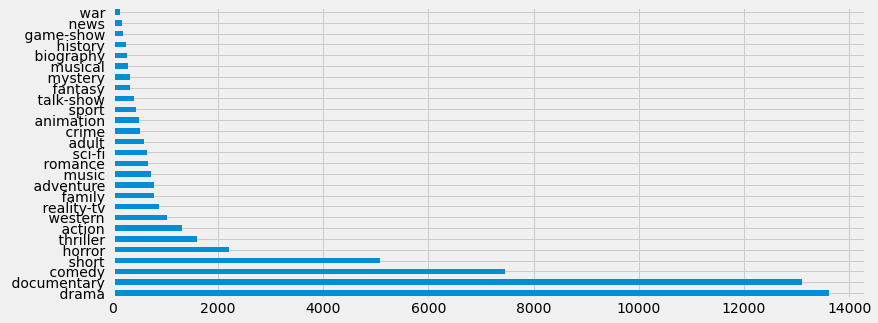

In [42]:
plt.figure(figsize=(12,5))
df['Genre'].value_counts().plot.barh()
plt.show()

In [43]:
df['description length']=df['Description'].apply(lambda x:len(x))   
df.head()

,Title,Genre,Description,description length
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625


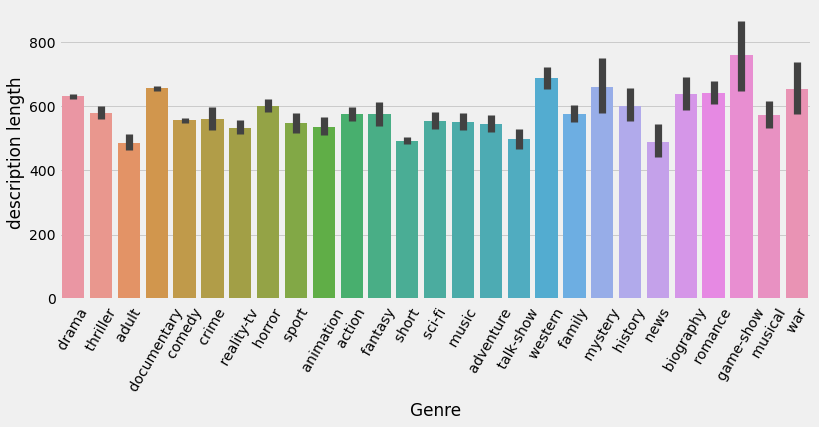

In [44]:
plt.figure(figsize=(12,5))
sns.barplot(x='Genre',y='description length',data=df)   # average length and its deviation for all classes
plt.xticks(rotation=60)
plt.show()

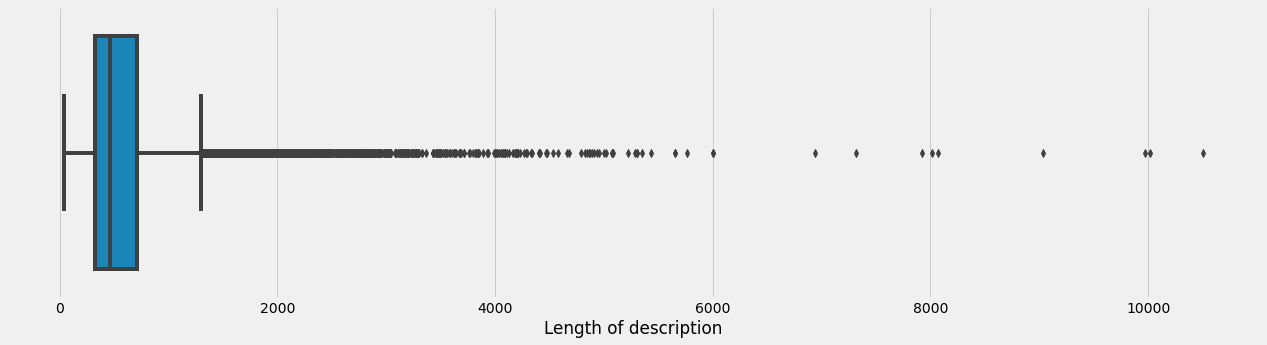

In [45]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df['description length'].values,hue='Genre',data=df)  # description length across all classes
plt.xlabel('Length of description')
plt.show()

# Data cleaning

In [46]:
import re,string
import nltk

from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer

stemmer=LancasterStemmer()
stopwords=stopwords.words('english')

def clean_text(text):
    text=re.sub('-',' ',text.lower())   
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stopwords]) # remove stopwords and stem other words
    text=re.sub(f'[{string.digits}]',' ',text)  
    return re.sub(f'[{re.escape(string.punctuation)}]','',text) 

print(f'Normal text: {"Certainly you get a dramatic boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38"}')
print(f"Cleaned text: {clean_text('Certainly you get a dramatic boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38')}")

Normal text: Certainly you get a dramatic boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38
Cleaned text: certain get dram boost hello bye hi iv iem k q    yee    e  


In [47]:
df['Cleaned Description']=df.Description.apply(clean_text)  
df_test['Cleaned Description']=df_test.Description.apply(clean_text)
df['Cleaned Desc length']=df['Cleaned Description'].apply(lambda x:len(x))
df.head()

,Title,Genre,Description,description length,Cleaned Description,Cleaned Desc length
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,list convers doct parents year old osc lear...,334
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,broth sist past incestu rel cur murd relations...,87
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,bus empty stud field trip muse nat history lit...,344
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,help unemploy fath mak end meet edi twin sist ...,631
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,films titl ref un recov body ground zero also ...,316


In [48]:
(df['Cleaned Desc length']>2000).value_counts()

False    54114
True       100
Name: Cleaned Desc length, dtype: int64

In [49]:
print('Dataframe size (before removal): ',len(df))
filt=df['Cleaned Desc length']>2000
df.drop(df[filt].index,axis=0,inplace=True)     
print('Dataframe size (after removal): ',len(df))
print(f'Removed rows: {filt.sum()}')

Dataframe size (before removal):  54214
Dataframe size (after removal):  54114
Removed rows: 100


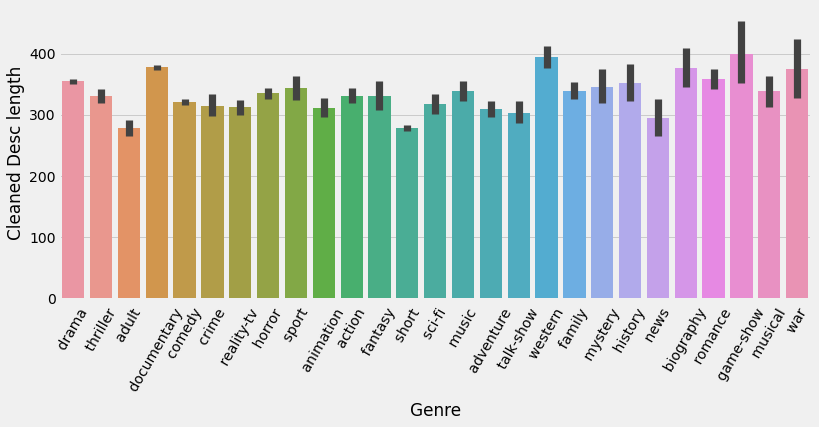

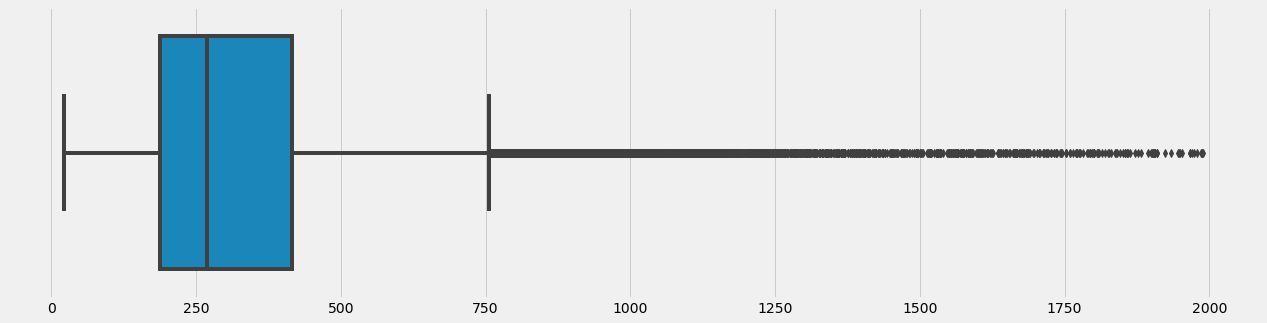

In [50]:
plt.figure(figsize=(12,5))
sns.barplot(x='Genre',y='Cleaned Desc length',data=df)
plt.xticks(rotation=60)
plt.show()
plt.figure(figsize=(20,5))
sns.boxplot(x=df['Cleaned Desc length'].values,hue='Genre',data=df)
plt.show()

In [51]:
df.drop(columns=['Title','Description','description length','Cleaned Desc length'],axis=1,inplace=True) 
df_test.drop(columns=['Title','Description'],axis=1,inplace=True)
df.head()

,Genre,Cleaned Description
1,drama,list convers doct parents year old osc lear...
2,thriller,broth sist past incestu rel cur murd relations...
3,adult,bus empty stud field trip muse nat history lit...
4,drama,help unemploy fath mak end meet edi twin sist ...
5,drama,films titl ref un recov body ground zero also ...


In [52]:
from tensorflow.keras.layers import TextVectorization
vocab_size=20000

vectorize_layer=TextVectorization(max_tokens=vocab_size,output_sequence_length=386)
vectorize_layer.adapt(df['Cleaned Description'],batch_size=256)

print('Vocab size: ',vocab_size)
print(vectorize_layer.get_vocabulary()[:10])

Vocab size:  20000
['', '[UNK]', 'on', 'film', 'new', 'liv', 'lif', 'story', 'find', 'tak']


In [53]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

x=vectorize_layer(df['Cleaned Description'])
x_test=vectorize_layer(df_test['Cleaned Description'])
y=encoder.fit_transform(df['Genre'])    # encode the genre labels to numbers
y_test=encoder.transform(df_test['Genre'])

print(f'X shape: {x.shape}, Y shape: {y.shape}')
num_classes=len(encoder.classes_)
print(f'Number of classes: {num_classes}')
print(encoder.classes_)

X shape: (54114, 386), Y shape: (54114,)
Number of classes: 27
[' action ' ' adult ' ' adventure ' ' animation ' ' biography ' ' comedy '
 ' crime ' ' documentary ' ' drama ' ' family ' ' fantasy ' ' game-show '
 ' history ' ' horror ' ' music ' ' musical ' ' mystery ' ' news '
 ' reality-tv ' ' romance ' ' sci-fi ' ' short ' ' sport ' ' talk-show '
 ' thriller ' ' war ' ' western ']


In [54]:
train_data=tf.data.Dataset.from_tensor_slices((x,y))  # tensorflow data processing pipeline
train_data=train_data.cache()
train_data=train_data.shuffle(50000)
train_data=train_data.batch(32)
train_data=train_data.prefetch(tf.data.AUTOTUNE)

data_test=tf.data.Dataset.from_tensor_slices((x_test,y_test))  # tensorflow data processing pipeline
data_test=data_test.cache()
data_test=data_test.shuffle(50000)
data_test=data_test.batch(32)
data_test=data_test.prefetch(tf.data.AUTOTUNE)
data_test=data_test.take(int(.2*len(data_test)))  # choosing only 20% of test data for validation

print(f'Train dataset size (with batches): {len(train_data)}')
print(f'Test dataset size (with batches): {len(data_test)}')

test_iterator=data_test.as_numpy_iterator()

_=test_iterator.next()
print(f'Data shape (with batches): {_[0].shape},{_[1].shape}')

Train dataset size (with batches): 1692
Test dataset size (with batches): 338
Data shape (with batches): (32, 386),(32,)


# model building

In [55]:
from tensorflow.keras.layers import Dropout,Embedding,Bidirectional,LSTM,Dense
from tensorflow.keras import Model,Input

In [56]:
embedding_dim=128
lstm_cells=128

def build_model(dim):
    inputs=Input(shape=(dim,))
    x=Embedding(vocab_size,embedding_dim)(inputs)
    x=Dropout(.4)(x)
    x=Bidirectional(
        LSTM(lstm_cells,dropout=.4,return_sequences=True)
    )(x)
    x=LSTM(lstm_cells,dropout=.4)(x)
    x=Dense(num_classes,activation='softmax')(x)
    
    model=Model(inputs=inputs,outputs=x,name='genre_classifier')
    return model

In [57]:
genre_classifier=build_model(x.shape[-1])
genre_classifier.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
genre_classifier.summary()

Model: "genre_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 386)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 386, 128)          2560000   
                                                                 
 dropout_1 (Dropout)         (None, 386, 128)          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 386, 256)          263168    
 onal)                                                           
                                                                 
 lstm_3 (LSTM)               (None, 128)               197120    
                                                                 
 dense_1 (Dense)             (None, 27)                3483      
                                                  

In [58]:
tf.keras.utils.plot_model(genre_classifier,show_shapes=True,show_layer_activations=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [59]:
genre_classifier(x[:1])

<tf.Tensor: shape=(1, 27), dtype=float32, numpy=
array([[0.03620052, 0.03855647, 0.03746042, 0.03721815, 0.0373445 ,
        0.03647799, 0.03644655, 0.03635273, 0.03710802, 0.03571715,
        0.03710562, 0.03791429, 0.03825019, 0.03679958, 0.03783458,
        0.03714652, 0.03791935, 0.035452  , 0.03615636, 0.03875828,
        0.03628913, 0.03671888, 0.036819  , 0.03734539, 0.03728842,
        0.03724039, 0.03607953]], dtype=float32)>

# Model Training 

In [89]:
history=genre_classifier.fit(train_data,epochs=2,validation_data=data_test,callbacks=[
    tf.keras.callbacks.TensorBoard(log_dir='logs'),
    tf.keras.callbacks.ModelCheckpoint('ckpt',save_best_only=True,verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(verbose=1)
])

Epoch 1/2
1692/1692 [==============================] - ETA: 0s - loss: 2.3507 - accuracy: 0.2468
Epoch 1: val_loss improved from inf to 2.33873, saving model to ckpt
INFO:tensorflow:Assets written to: ckpt\assets


INFO:tensorflow:Assets written to: ckpt\assets


1692/1692 [==============================] - 8154s 5s/step - loss: 2.3507 - accuracy: 0.2468 - val_loss: 2.3387 - val_accuracy: 0.2400 - lr: 0.0100
Epoch 2/2
1692/1692 [==============================] - ETA: 0s - loss: 2.3508 - accuracy: 0.2474
Epoch 2: val_loss did not improve from 2.33873
1692/1692 [==============================] - 12721s 8s/step - loss: 2.3508 - accuracy: 0.2474 - val_loss: 2.3430 - val_accuracy: 0.2482 - lr: 0.0100


In [90]:
df=pd.DataFrame(history.history)
df.to_csv('metrics.csv')

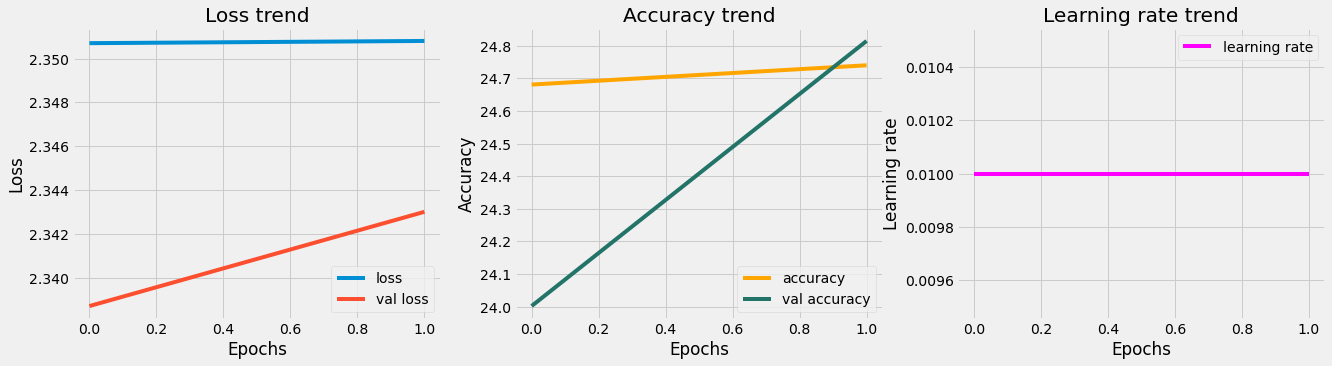

In [91]:
df=pd.read_csv('metrics.csv')
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(nrows=1,ncols=3)
fig.set_figwidth(20)
fig.set_figheight(5)
ax[0].plot(df['loss'],label='loss')
ax[0].plot(df['val_loss'],label='val loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].set_title('Loss trend')

ax[1].plot(df['accuracy']*100,label='accuracy',color='orange')
ax[1].plot(df['val_accuracy']*100,label='val accuracy',color='#237468')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].set_title('Accuracy trend')

ax[2].plot(df['lr'],label='learning rate',color='magenta')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Learning rate')
ax[2].legend()
ax[2].set_title('Learning rate trend')
plt.show()

In [92]:
df_test=pd.read_csv(r'D:\document\Genre Classification Dataset/test_data_solution.txt',sep=':::',engine='python',names=['Title','Genre','Description'])
df_test['Cleaned Description']=df_test.Description.apply(clean_text)
df_test.drop(columns=['Title','Description'],axis=1,inplace=True)
df_test.head()

,Genre,Cleaned Description
1,thriller,lr bran lov lif car apartment job espec girlfr...
2,comedy,spain march quico naughty child three bel...
3,documentary,on year lif albin famy shepherd nor transylvan...
4,drama,fath died spok broth year sery cancer diego...
5,drama,known intern mart art superstar bruc lee appea...


In [93]:
x_test=vectorize_layer(df_test['Cleaned Description'])
y_test=encoder.transform(df_test['Genre'])

test_data=tf.data.Dataset.from_tensor_slices((x_test,y_test))
test_data=test_data.cache()
test_data=test_data.shuffle(50000)
test_data=test_data.batch(32)
test_data=test_data.prefetch(tf.data.AUTOTUNE)
print(f'Test dateset size (with batches): {len(test_data)}')

Test dateset size (with batches): 1694


In [94]:
loss,acc=genre_classifier.evaluate(test_data)
print(f'Test dataset loss: {loss:.4f}')
print(f'Test dataset accuracy : {acc*100:.4f}%')

1694/1694 [==============================] - 2616s 2s/step - loss: 2.3497 - accuracy: 0.2511
Test dataset loss: 2.3497
Test dataset accuracy : 25.1144%


In [95]:
genre_classifier.load_weights(r'C:\Users\Rahul Yadav\Documents/ckpt')
tf.keras.models.save_model(genre_classifier,'models/genre_classifier.h5')
genre_classifier.save('metadata')

C:\Users\RAHULY~1\AppData\Local\Temp/ipykernel_15908/4228583181.py:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(genre_classifier,'models/genre_classifier.h5')


INFO:tensorflow:Assets written to: metadata\assets


INFO:tensorflow:Assets written to: metadata\assets


In [96]:
import pickle

with open('label_encoder.h5','wb') as f:
    pickle.dump(encoder,f)
    
def build_end2end_model():
    inputs=Input(shape=(1,),dtype=tf.string)
    x=vectorize_layer(inputs)
    outputs=genre_classifier(x)
    return Model(inputs=inputs,outputs=outputs,name='genre_classifier_end2end')

end2end_model=build_end2end_model()
end2end_model.save('end2end_model',save_format='tf')

INFO:tensorflow:Assets written to: end2end_model\assets


INFO:tensorflow:Assets written to: end2end_model\assets


# Make Predictions

In [97]:
end2end_model=tf.keras.models.load_model(r'C:\Users\Rahul Yadav\Documents/end2end_model')

def preprocess(texts):
    output=[]
    if type(texts)==str:
        texts=[texts]
    for text in texts:
        output.append(np.array(clean_text(text)))
    return np.array(output)

def make_prediction(texts):
    if type(texts)==str:
        texts=[texts]
    predictions=[]
    descriptions=preprocess(texts)
    preds=end2end_model(descriptions,training=False)
    preds=tf.argmax(preds,axis=-1).numpy()
    for i in range(len(texts)):
        predictions.append({'description':texts[i],'genre':encoder.inverse_transform(preds[[i]])[0]})
    return predictions

In [98]:
make_prediction([
    '''Whether it's blocking up mouse holes, running from Landlords or making puppet shows in the bath, it's never a dull moment for The Young Professionals. Desperate to break into the online world and escape the terrors of temping, Natalie presents the lives of six housemates struggling to get on the career ladder after uni and pay their rent on time. Which is all helped along with Keara - the one with the 'real' job.''',
    '''A great leader was killed at the end of the 20th century. His name was Fame Douglas, and he was renowned as the sponsor of the legendary Dead or Alive World Combat Championship. Since his death, and in the absence of his charisma and leadership, the world has become chaotic! Yet something appears to be transpiring.''',
    '''A horror movie about ghosts, possession, reincarnation. Ah Kan (Chan Chen) encounters sinister turns of fate where he works (a fellow security guard dies by choking on a bone, another is strangled by a wet newspaper), and he becomes frightened enough to consult with a Taoist priest.''',
    '''Anna is quiet, living with her parents, cashiering at a café bar in Bergamo. She meets and falls for Guido, a Milanese gangster in town to lie low. He pursues her, but also warns her that he's no good. She goes to Milan with him anyway.''',
    '''As they want to flee Paris to escape thugs, Varen and Bob find themselves in need money. They go to ask Georges, who proposes a deal: they'll be paid if they provide young women to feed his traffic. Varen refuses this kind of work but Bob accept and brings an attractive girl, Leda, in Georges nets.''',
    '''When Marcus, a 18 years old actor overdose marijuana, he wakes up without feeling and reality of sexual dysfunction AKA his homosexuality. In a communist world, he struggles to be understood by society. He tries to turn himself back to normal by having sex with a girlfriend.'''
])

[{'description': "Whether it's blocking up mouse holes, running from Landlords or making puppet shows in the bath, it's never a dull moment for The Young Professionals. Desperate to break into the online world and escape the terrors of temping, Natalie presents the lives of six housemates struggling to get on the career ladder after uni and pay their rent on time. Which is all helped along with Keara - the one with the 'real' job.",
  'genre': ' documentary '},
 {'description': 'A great leader was killed at the end of the 20th century. His name was Fame Douglas, and he was renowned as the sponsor of the legendary Dead or Alive World Combat Championship. Since his death, and in the absence of his charisma and leadership, the world has become chaotic! Yet something appears to be transpiring.',
  'genre': ' documentary '},
 {'description': 'A horror movie about ghosts, possession, reincarnation. Ah Kan (Chan Chen) encounters sinister turns of fate where he works (a fellow security guard d